In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.8.2


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science and ML for Python 2022 Dortmund/Team assignment T3/hepsiburada.csv')
df.head()

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...


In [ ]:
lab_to_sentiment = {0:"Negative", 1:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.Rating = df.Rating.apply(lambda x: label_decoder(x))
df.head()

,Rating,Review
0,Positive,3 yıldır tık demedi. :)
1,Positive,3 yıldır kullanıyorum müthiş
2,Positive,Ürün bugün elime geçti çok fazla inceleme fırs...
3,Positive,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,Positive,Günlük kullanımınızı çok çok iyi karsılıyor kı...


Text(0.5, 1.0, 'Sentiment Data Distribution')

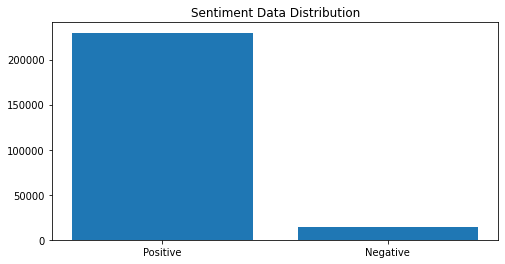

In [ ]:
val_count = df.Rating.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [ ]:
import random
random_idx_list = [random.randint(1,len(df.Review)) for i in range(10)] 
df.loc[random_idx_list,:].head(10) 

,Rating,Review
125752,Positive,"ben bir yıldır kullanıyorum, çok güzelbir koku..."
148853,Positive,burdaki yorumlara bakarak aldım . 2 gün oldu h...
101524,Positive,süper bi ürün. emzirirken inanılmaz rahat ediy...
123035,Positive,erkekte koku budur başka parfümlerle oyalanmay...
136238,Positive,Geçen sene de aldım.Bir arkadaşla paylaştık.O ...
32311,Positive,hızlı teslimat. ürün zaten süper.sorunsuz alış...
88209,Positive,bmw marka aracıma yeni yağ değişimi yaptım mot...
181158,Negative,bezler çok kötü kimyasal kokuyor. pişik de yap...
214701,Positive,Özellikle küçük ekran ve sağlam telefon isteye...
203289,Negative,berbat bir film konu yok yapılan şeyler mantık...


In [ ]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
        
  return " ".join(tokens)

In [ ]:
df.Review = df.Review.apply(lambda x: preprocess(x))

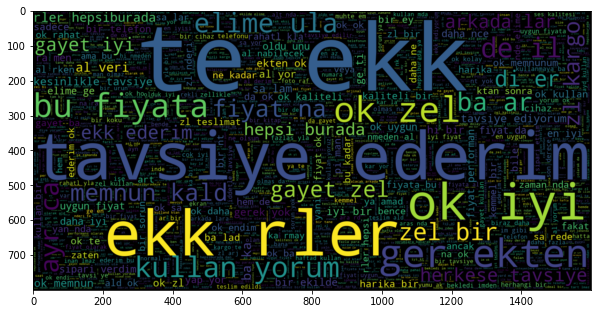

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Rating	 == 'Positive'].Review))
plt.imshow(wc , interpolation = 'bilinear')

Negative Words

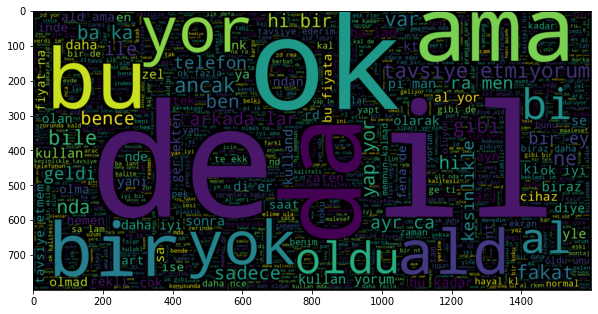

In [ ]:
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Rating == 'Negative'].Review))
plt.imshow(wc , interpolation = 'bilinear')